# B8IT109 Advanced Data Analytics - CA Two

## Kaggle’s Titanic Machine Learning Competition

### Student Name : Manoj Kumar Thangaraj
### Student Number : 10570753
### Kaggle Account Username : manojkumarthangaraj 
### Kaggle UserID : User ID 7164562
### Email ID: manojthangaraj92@gmail.com



In [ ]:
# Import the requried libraries

import pandas as pd   #pandas for reading the csv file and all dataframe operations
import numpy as np    #mainly used for Deep learining when its converting into array
import matplotlib.pyplot as plt   #matplotlib and sns are mainly used for visualization
import seaborn as sns
%matplotlib inline

#Import the required libraries for Hot encoding

from sklearn.preprocessing import LabelEncoder, OneHotEncoder   #for integer encoding and onehot encoding
from sklearn.compose import ColumnTransformer                   #to transfer columns in case needed
from sklearn.preprocessing import StandardScaler                #scaling columns when especially in deep learning

#Import the traditional machine learning libraries
from sklearn import svm                                    #support vector machine algorithm from sklearn library
from sklearn.ensemble import RandomForestClassifier        #Random Forest algorithm from sklearn library

# Importing the Keras libraries and packages
import tensorflow as tf                                    #tensorflow, keras, sequential and dense for deep learning
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

In [43]:
#read the csv files

df_test = pd.read_csv("test.csv", index_col = "PassengerId")         #test file
df_train = pd.read_csv("train.csv", index_col = "PassengerId")       #training file

In [44]:
# Check the data frame for train dataset

df_train.head()                   #using .head() from pandas

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [45]:
# Check the data frame  for test dataset

df_test.head()                  #using .head() from pandas

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [46]:
# Check the data type of the each columns in train dataset

df_train.dtypes         # using .dtypes function

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [47]:
# Check the data type of the each columns in test dataset

df_test.dtypes          # using .dtypes function

Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [48]:
# Data profiling is the first step in the assesing the quality of the data

# Variable Passenger ID, Name, Ticket is not much important for the analysis as it does not contribute much in survival predictions

# the data types of all columns are relevant except the df["Pclass"]. Therefore, converting them as factors or objects

df_test["Pclass"] = df_test["Pclass"].astype(object)
df_train["Pclass"] = df_train["Pclass"].astype(object)

In [49]:
# let's describe the other columns in the dataset

df_train[["Age", "Fare","SibSp","Parch"]].describe()        #using .describe() function

,Age,Fare,SibSp,Parch
count,714.000000,891.000000,891.000000,891.000000
mean,29.699118,32.204208,0.523008,0.381594
std,14.526497,49.693429,1.102743,0.806057
min,0.420000,0.000000,0.000000,0.000000
25%,20.125000,7.910400,0.000000,0.000000
50%,28.000000,14.454200,0.000000,0.000000
75%,38.000000,31.000000,1.000000,0.000000
max,80.000000,512.329200,8.000000,6.000000


In [50]:
# In age, the count seems low, there might be a missing values. we will check for missing values on each column.

df_train.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [51]:
# We must impute the values in the columns age and Embarked to avoid missing values in the data.

# for the ages, we can choose to impute the mean value for each passenger class and for embarked the mode value

df_train["Age"] = df_train["Age"].fillna(df_train.groupby("Pclass")["Age"].transform("mean"))    #.transform(mean) will transform mean and impute them
df_train["Embarked"] = df_train["Embarked"].fillna('mode')     #.fillna() with mode values

In [52]:
# We must impute the values in the columns age and Embarked to avoid missing values in the data.

# for the ages, we can choose to impute the mean value for each passenger class and for embarked the mode value

df_test["Age"] = df_test["Age"].fillna(df_test.groupby("Pclass")["Age"].transform("mean"))   #.transform(mean) will transform mean and impute them
df_test["Embarked"] = df_test["Embarked"].fillna('mode')               #.fillna() with mode values

In [53]:
#drop the unwanted columns and dropping cabin column because it has too many missing values in the train dataset

df_train = df_train.drop(['Name'], axis = 1)
df_train = df_train.drop(['Cabin'], axis = 1)
df_train = df_train.drop(['Ticket'], axis = 1)

In [54]:
# Dropping the columns which are not important in the test dataset

df_test = df_test.drop(['Name'], axis = 1)
df_test = df_test.drop(['Cabin'], axis = 1)
df_test = df_test.drop(['Ticket'], axis = 1)

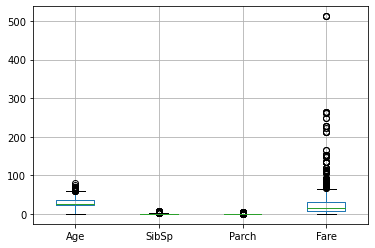

In [55]:
# Not let's look at some visualization of the datasets.

#boxplot of the dataframe to check for outliers

df_train.boxplot(column=['Age', 'SibSp', 'Parch', 'Fare'])

Since these columns are not continous values, we dont have to filter out the outliers

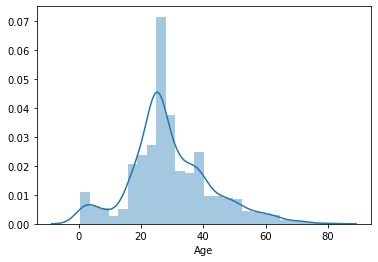

In [23]:
# Lets see the distribution of age through SNS distplot

sns.distplot(df_train['Age'])

The age is fairly normally distributed

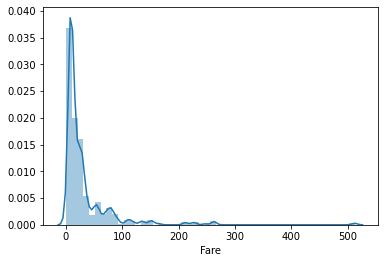

In [24]:
# Lets see the distribution of fare through SNS distplot

sns.distplot(df_train['Fare'])

The Fare rate is not normally distributed

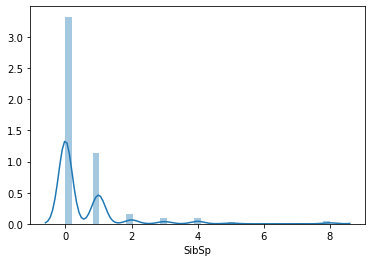

In [25]:
# Lets see the distribution of SibSp through SNS distplot

sns.distplot(df_train['SibSp'])

SibSp column is not normally distributed

C:\Users\manoj\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


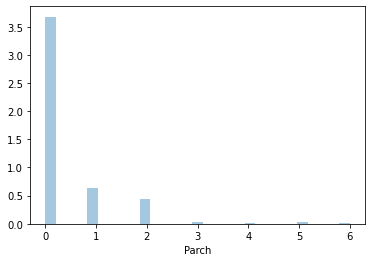

In [27]:
# Lets see the distribution of Parch through SNS distplot

sns.distplot(df_train['Parch'])

Again, the Parch column is not nomally distributed

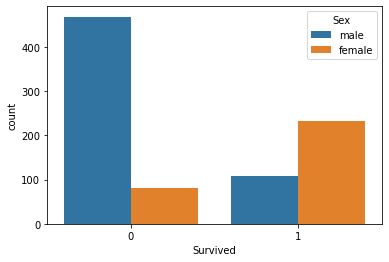

In [28]:
# Lets looks at the survival data by sex, Pclass, SibSp, Parch
# Lets use the sns.countplot to deal with the categorical variables

sns.countplot(x="Survived", hue='Sex', data=df_train)

Males did not survive in most number and females survived higher than males

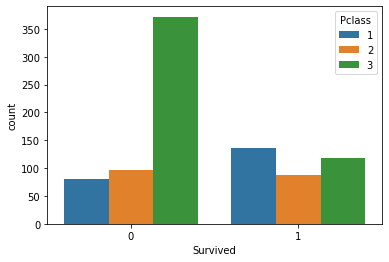

In [29]:
# Countplot survived by Pclass

sns.countplot(x="Survived", hue='Pclass', data=df_train)

This tells us the passenger in the third class has died in higher number.

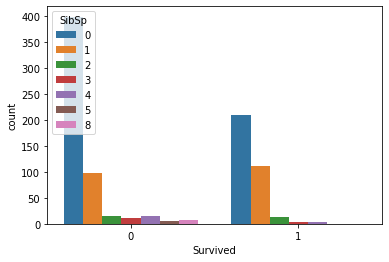

In [30]:
# Countplot survived by SibSp

sns.countplot(x="Survived", hue='SibSp', data=df_train)

People who had no siblings in the ship died and survived the most. There are many reasons for this to happen

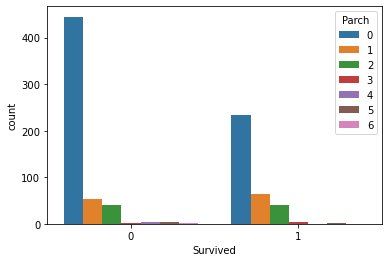

In [31]:
# Countplot survived by Parch

sns.countplot(x="Survived", hue='Parch', data=df_train)

This plot tells us the same as above.

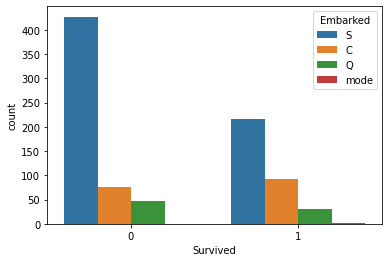

In [32]:
# Countplot survived by Embarked

sns.countplot(x="Survived", hue='Embarked', data=df_train)

Again, People came from S have died and survuved the most. Its clear that there are more passengers from S than the other two stations.

The male category, the people who travelled in third class, people who are accompanied by zero sibilings, people who are accompanied by zero have died the most.

From the above visuals, Parch and SibSp columns seems like they can be treated as the categories.

In [56]:
# Convert the above mentioned columns as a factors in both train and test datasets.

df_train["Parch"] = df_train["Parch"].astype(object)
df_train["SibSp"] = df_train["SibSp"].astype(object)
df_test["Parch"] = df_test["Parch"].astype(object)
df_test["SibSp"] = df_test["SibSp"].astype(object)

In [57]:
df_test.isnull().sum() #Check for null values

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        1
Embarked    0
dtype: int64

In [58]:
# since we have one fare missing value in the test set, we will impute the median value on that

df_test["Fare"] = df_test["Fare"].fillna(df_test.groupby("Pclass")["Fare"].transform("median"))

In [59]:
#Let's convert the categorical data into numerical but as a factor since ML algroithm won't take it as a input

Label_Encoder_X = LabelEncoder()
df_train["Sex"] = Label_Encoder_X.fit_transform(df_train["Sex"])
df_test["Sex"] = Label_Encoder_X.fit_transform(df_test["Sex"])
df_train["Embarked"] = Label_Encoder_X.fit_transform(df_train["Embarked"])
df_test["Embarked"] = Label_Encoder_X.fit_transform(df_test["Embarked"])

In [60]:
#Let's check the values now on train dataset

df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,1,22.0,1,0,7.2500,2
2,1,1,0,38.0,1,0,71.2833,0
3,1,3,0,26.0,0,0,7.9250,2
4,1,1,0,35.0,1,0,53.1000,2
5,0,3,1,35.0,0,0,8.0500,2


In [61]:
#Let's check the values now on test dataset

df_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
892,3,1,34.5,0,0,7.8292,1
893,3,0,47.0,1,0,7.0000,2
894,2,1,62.0,0,0,9.6875,1
895,3,1,27.0,0,0,8.6625,2
896,3,0,22.0,1,1,12.2875,2


In [62]:
#We will make a copy of the data frames for RandomClassifier, SVM and ANN

df_trainRandom = df_train.copy()
df_trainSVM = df_train.copy()
df_trainANN = df_train.copy()

df_testRandom = df_test.copy()
df_testSVM = df_test.copy()
df_testANN = df_test.copy()

In [63]:
#This procedure is for Random Classifier

# Selecting the features and labels

X=df_trainRandom[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']]  # Features
y=df_trainRandom['Survived']  # Labels

In [64]:
#Create a Gaussian Classifier

clf=RandomForestClassifier(n_estimators=100)    

#Train the model using the training sets using .fit()

clf.fit(X,y)

#Make predictions using .predict()

y_pred=clf.predict(df_testRandom)   
df_testRandom["survived"] = y_pred    #assigning it to a new column to write to csv later 

#Saving the file to be submitted
df_testRandom["survived"].to_csv('submissions_randomforest.csv', index = True)   #writing to csv

The random forest classifier yielded the accuracy rate of about 74.641 percent but previous attempt in Kaggle yielded a good result of about 77 percent.

In [65]:
#This procedure is for SVM Classifier

# Selecting the features and labels

XSVM=df_trainSVM[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']]  # Features
ySVM=df_trainSVM['Survived']  # Labels

In [66]:
#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets using .fit()
clf.fit(XSVM, ySVM)

#Predict the response for test dataset using .predict()
y_predSVM = clf.predict(df_testSVM)

#saving the predictions to the files

df_testSVM["Survived"] = y_predSVM           #assigning it to a new column to write to csv later 
df_testSVM["Survived"].to_csv('submission_svm.csv', index = True)       #writing to csv

The accuracy rate on SVM with linear is 76.555 percent when we tried with kernel rbf version the accuracy rate went down.

In [204]:
#We will make a copy of the data frames for ANN

df_trainANN7 = df_train.copy()       #using .copy() function
df_testANN7 = df_test.copy()

In [205]:
#This procedure is for Artificial Neural Networks

# Selecting the features and labels

XANN7=df_trainANN7[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']]  # Features
yANN7=df_trainANN7['Survived']  # Labels

In [206]:
#Lets do it with the one hot encoder (the required libraries are imported above)

ohe = OneHotEncoder(sparse=False)
XANN7["Embarked"] = ohe.fit_transform(XANN7[["Embarked"]])                #transforming the train set
df_testANN7["Embarked"] = ohe.fit_transform(df_testANN7[["Embarked"]])    #transforming the test set



<ipython-input-206-9a88c59d763f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  XANN7["Embarked"] = ohe.fit_transform(XANN7[["Embarked"]])


In [212]:
# Feature Scaling

sc = StandardScaler()                   #scaler function from sklearn
XANN7 = sc.fit_transform(XANN7)         #transforming the train set
df_testANN7 = sc.transform(df_testANN7)  #transforming the test set

In [213]:
# Initialising the ANN

classifier = Sequential()

classifier.add(Dense(14, input_dim=7, activation='relu'))   # we will double the first hidden layer and bring equal to the number of input layer next time and finally to 1
classifier.add(Dense(7, activation='relu'))                 #rectified linear unit as an activation function here
classifier.add(Dense(1, activation='sigmoid'))              #we will use sigmoid as an activation function here insted of sgd since sigmoid yeilds good result.

# Compiling the ANN with adam optimizer and since it binary classification, we are using binary_crossentropy in loss.
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set and batch size as 10 since the test set has only few rows and epoch as 100 to adjust errors and get a better result.
classifier.fit(XANN7, yANN7, batch_size = 10, epochs = 100)


Epoch 1/100
90/90 [==============================] - 1s 1ms/step - loss: 0.7292 - accuracy: 0.5259
Epoch 2/100
90/90 [==============================] - 0s 1ms/step - loss: 0.5775 - accuracy: 0.7437
Epoch 3/100
90/90 [==============================] - 0s 2ms/step - loss: 0.5352 - accuracy: 0.7364
Epoch 4/100
90/90 [==============================] - 0s 1ms/step - loss: 0.4757 - accuracy: 0.7811
Epoch 5/100
90/90 [==============================] - 0s 1ms/step - loss: 0.4487 - accuracy: 0.7857
Epoch 6/100
90/90 [==============================] - 0s 2ms/step - loss: 0.4159 - accuracy: 0.8125
Epoch 7/100
90/90 [==============================] - 0s 2ms/step - loss: 0.4480 - accuracy: 0.7950
Epoch 8/100
90/90 [==============================] - 0s 1ms/step - loss: 0.4151 - accuracy: 0.8118
Epoch 9/100
90/90 [==============================] - 0s 1ms/step - loss: 0.3913 - accuracy: 0.8375
Epoch 10/100
90/90 [==============================] - 0s 2ms/step - loss: 0.4179 - accuracy: 0.8228
Epoch 11/

In [214]:
# Part 3 - Making the predictions and evaluating the model

# Predicting the Test set results
y_predANN = classifier.predict(df_testANN7)
y_final = (y_predANN > 0.5).astype(int).ravel()   #converting the prediction number to either 0 or 1
y_final = list(y_final)           #converting the ndarray into list to append to the dataset later on.

#saving the predictions to the files

df_test2 = pd.read_csv("test.csv", index_col = "PassengerId") #reading the file once again to take up the passenger id column.
df_test2["Survived"] = y_final        #assign it to a new column
df_test2["Survived"].to_csv('submission_ann.csv', index = True)  #write them into a csv file.

I made a three different attempts in with Deep Learning. Two times with OneHotEncoder and one time without OneHotEncoder. The attempt without using OneHotEncoder yeilded me a best result with accuracy of 77.03 percent.